**3.0 Data Preparation:**

**3.1 Import Libraries**

**Goal**: Load all necessary libraries for data handling, visualization, preprocessing, modeling, and evaluation.

**Helps with**: Creating a ready-to-use environment for exploratory analysis, preprocessing, and building ML models.

In [1]:
# import libraries

# to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

**3.2 Data Loading and Exploration | Cleaning**

**3.2.1 Load the Dataset**

**Goal**: Load the dataset into memory.

**Helps with**: Gives the raw data needed for analysis.

In [2]:
# loading the data from csv file
df = pd.read_csv('/content/creditcard.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# print the first 5 rows of the dataframe
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**3.2.3 Explore the Data**

**Goal**: Understand the data structure, types, and size.

**Helps with**: Knowing how many samples and features we have, and identifying if cleaning is needed.

In [5]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59511 entries, 0 to 59510
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    59511 non-null  int64  
 1   V1      59511 non-null  float64
 2   V2      59511 non-null  float64
 3   V3      59511 non-null  float64
 4   V4      59511 non-null  float64
 5   V5      59511 non-null  float64
 6   V6      59511 non-null  float64
 7   V7      59511 non-null  float64
 8   V8      59511 non-null  float64
 9   V9      59511 non-null  float64
 10  V10     59511 non-null  float64
 11  V11     59511 non-null  float64
 12  V12     59511 non-null  float64
 13  V13     59511 non-null  float64
 14  V14     59511 non-null  float64
 15  V15     59511 non-null  float64
 16  V16     59510 non-null  float64
 17  V17     59510 non-null  float64
 18  V18     59510 non-null  float64
 19  V19     59510 non-null  float64
 20  V20     59510 non-null  float64
 21  V21     59510 non-null  float64
 22

In [6]:
# finding the shape of the dataset

df.shape

(59511, 31)

In [7]:
# Displaying the column names

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Observation Set 1:**

There are 59511 rows and 31 columns in the dataset.
The data type of all columns is numeric (int and float).

The columns in the datasets are:
'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'

The 'Class' column (0: Legit, 1: Fraud) is the target.

**3.2.4 Descriptive Statistics:**

Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.

**Goal**: Get central tendency and dispersion measures.

**Helps with**: Spotting skewed distributions or outliers.

In [8]:
# Summary Statistics

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000
mean,31748.304398,-0.238817,-0.010192,0.688628,0.171355,-0.259802,0.102828,-0.114713,0.055186,0.063558,-0.045596,0.330851,-0.253206,0.115596,0.129621,0.140874,-0.012171,0.096920,-0.094309,-0.024324,0.048044,-0.027845,-0.107505,-0.039753,0.006762,0.136147,0.020146,0.002969,0.004292,95.417957,0.002722
std,13666.604320,1.866654,1.658360,1.446481,1.386071,1.394132,1.308181,1.251962,1.191471,1.183014,1.111556,1.102843,1.274509,1.097270,1.074807,0.943501,0.935211,1.058159,0.867186,0.818269,0.750561,0.723975,0.637525,0.594265,0.596854,0.438683,0.498979,0.384503,0.325266,270.114653,0.052104
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,-4.049895,-17.769143,-3.844974,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-15.806476,-20.262054,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,26157.000000,-0.993866,-0.581502,0.204150,-0.726730,-0.877828,-0.636651,-0.604518,-0.145127,-0.648030,-0.519462,-0.467987,-0.754494,-0.616909,-0.314725,-0.416315,-0.493355,-0.375276,-0.570664,-0.519524,-0.165775,-0.228746,-0.527697,-0.179894,-0.325270,-0.128046,-0.330056,-0.063393,-0.006316,7.680000,0.000000
50%,35617.000000,-0.245303,0.075692,0.779272,0.184175,-0.293976,-0.151705,-0.074176,0.061639,-0.039883,-0.103380,0.275899,0.019551,0.067875,0.119016,0.252604,0.058256,0.041782,-0.080025,-0.029694,-0.022316,-0.063847,-0.082948,-0.051941,0.061830,0.174226,-0.075484,0.008921,0.022539,25.950000,0.000000
75%,42028.000000,1.155001,0.731551,1.413495,1.053194,0.278931,0.492737,0.424395,0.337132,0.735236,0.429318,1.129700,0.568354,0.821239,0.594530,0.818551,0.546643,0.514739,0.399100,0.483416,0.172861,0.112591,0.307969,0.078831,0.403203,0.422293,0.297880,0.082628,0.076307,87.540000,0.000000
max,48871.000000,1.960497,18.183626,4.101716,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


**3.3 Normalization:**

**Goal**: Impute missing values and normalize feature vectors.

**Helps with**: Ensures models are not biased due to scale or NaN values. L2 normalization turns rows into unit vectors.

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
import pandas as pd

# Since df is our DataFrame
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', etc.
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Now applying normalization
normalizer = Normalizer(norm='l2')
df_normalized = pd.DataFrame(normalizer.fit_transform(df_imputed), columns=df.columns)

print(df_normalized.head())

       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000 -0.009085 -0.000486  0.016946  0.009208 -0.002260  0.003089   
1  0.000000  0.314200  0.070163  0.043888  0.118143  0.015822 -0.021712   
2  0.002641 -0.003587 -0.003539  0.004682  0.001003 -0.001329  0.004754   
3  0.008092 -0.007819 -0.001499  0.014509 -0.006986 -0.000083  0.010092   
4  0.028527 -0.016520  0.012520  0.022090  0.005749 -0.005808  0.001368   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.001601  0.000659  0.002431  0.000607 -0.003685 -0.004128 -0.006624   
1 -0.020774  0.022435 -0.067336 -0.044018  0.425151  0.280820  0.128936   
2  0.002090  0.000654 -0.004000  0.000548  0.001649  0.000174  0.001894   
3  0.001923  0.003054 -0.011224 -0.000445 -0.001833  0.001442  0.004109   
4  0.008457 -0.003859  0.011664  0.010741 -0.011737  0.007677  0.019196   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.002079  0.009809 -

**3.4 Class Distribution and Visualization:**

**Goal**: Understand the imbalance between fraud and legit transactions.

**Helps with**: Reveals the rarity of fraud (~0.17% of data), making imbalance a major challenge.

In [10]:
# distribution of legitimate transactions & fraudulent transactions

df['Class'].value_counts()

,count
Class,
0.0,59348
1.0,162


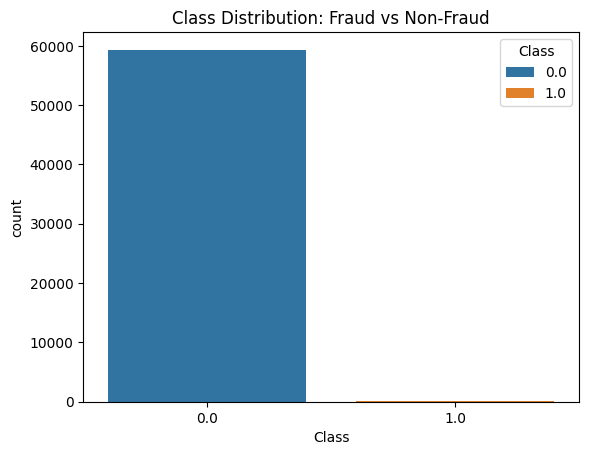

In [11]:
sns.countplot(x='Class',data=df,hue='Class')
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.show()

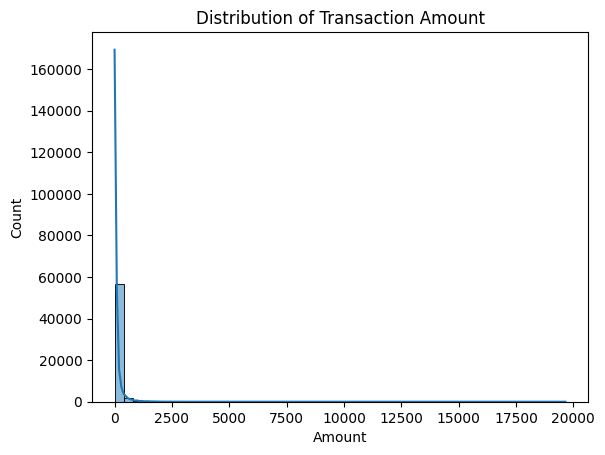

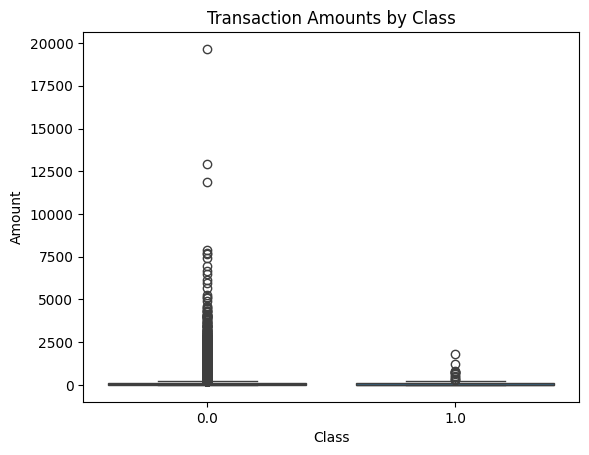

Skewness of Amount: nan
Kurtosis of Amount: nan


In [12]:
from scipy.stats import skew, kurtosis

sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.show()

sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts by Class")
plt.show()

print("Skewness of Amount:", skew(df['Amount']))
print("Kurtosis of Amount:", kurtosis(df['Amount']))

**Correlation Matrix**

**Goal**: Discover relationships between features.

**Helps with**: Identifies highly correlated variables.

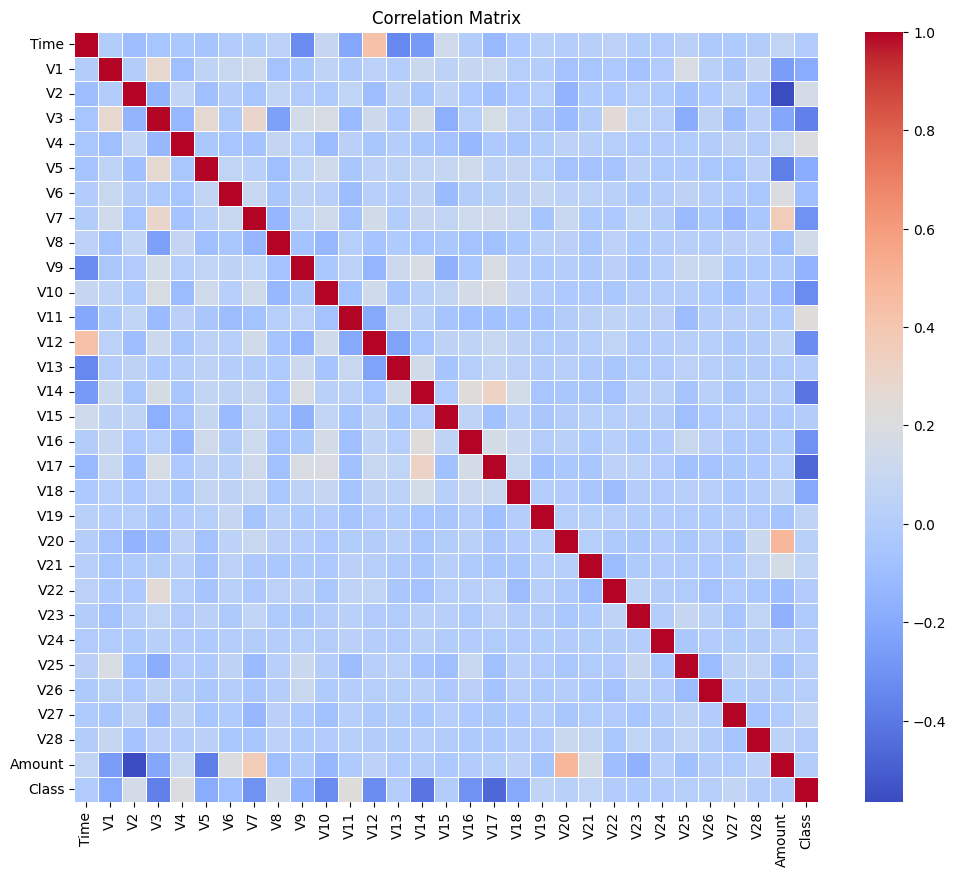

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Legit vs Fraud Data Separation**

**Goal**: Allows independent analysis of both classes.

**Helps with**: Insights into how fraud differs from normal behavior.

In [14]:
# separating the data for analysis

legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [15]:
# statistical measures of the legit data

legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.000000,59348.0
mean,31756.653956,-0.220094,-0.024129,0.716642,0.156674,-0.246262,0.108918,-0.094662,0.045945,0.072867,-0.026413,0.317840,-0.231725,0.115199,0.152934,0.140825,0.002866,0.122551,-0.085214,-0.026707,0.047016,-0.030245,-0.107240,-0.039144,0.006999,0.135867,0.019860,0.001431,0.004203,95.423013,0.0
std,13666.010306,1.782780,1.623640,1.266426,1.350355,1.329961,1.302057,1.137762,1.145960,1.163115,1.022835,1.065147,1.183728,1.097525,0.950769,0.943882,0.864510,0.845127,0.834039,0.813567,0.749828,0.720171,0.636915,0.588053,0.597007,0.436114,0.499214,0.378470,0.324068,270.229826,0.0
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-4.532523,-11.208723,-4.049895,-15.144988,-3.844974,-13.780377,-4.152532,-10.115560,-17.098444,-5.366660,-7.213527,-15.806476,-20.262054,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.0
25%,26178.250000,-0.988727,-0.584184,0.210258,-0.729559,-0.874316,-0.633454,-0.601353,-0.145412,-0.643768,-0.516663,-0.469195,-0.743813,-0.617432,-0.310748,-0.416928,-0.489136,-0.373261,-0.567361,-0.519729,-0.165819,-0.228925,-0.527334,-0.179558,-0.325263,-0.127908,-0.330262,-0.063482,-0.006288,7.690000,0.0
50%,35621.000000,-0.240895,0.073221,0.782231,0.178981,-0.292529,-0.149974,-0.072464,0.060809,-0.037662,-0.101580,0.270935,0.022127,0.066809,0.121397,0.252738,0.060809,0.043276,-0.078753,-0.030678,-0.022617,-0.064548,-0.082948,-0.051855,0.061799,0.174238,-0.075733,0.008745,0.022492,25.985000,0.0
75%,42036.000000,1.155507,0.726666,1.415103,1.046712,0.279640,0.494823,0.425512,0.334986,0.737680,0.431669,1.124026,0.569881,0.820565,0.596351,0.818684,0.547764,0.515251,0.400132,0.480713,0.171727,0.111148,0.307849,0.078742,0.403282,0.421968,0.296742,0.081955,0.075970,87.440000,0.0
max,48870.000000,1.960497,18.183626,4.101716,16.715537,34.801666,22.529298,36.677268,18.709255,10.392889,13.198226,10.002190,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,5.041069,4.727190,39.420904,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,0.0


In [16]:
legit.Amount.describe()

,Amount
count,59348.000000
mean,95.423013
std,270.229826
min,0.000000
25%,7.690000
50%,25.985000
75%,87.440000
max,19656.530000


In [17]:
# statistical measures of the fraud data

fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0
mean,28583.783951,-7.086497,5.090192,-9.571784,5.554124,-5.230160,-2.157161,-7.462325,3.433510,-3.352556,-7.072281,5.107569,-8.126237,0.264857,-8.404386,0.173047,-5.520766,-9.292720,-3.426259,0.848795,0.424429,0.851337,-0.204490,-0.262548,-0.080078,0.238594,0.124826,0.566296,0.036929,93.565988,1.0
std,13533.586582,8.308111,4.305421,8.715303,2.955288,6.439169,1.528734,6.907412,5.396834,2.616428,4.608336,2.884293,4.621983,0.993733,4.504924,0.774770,4.143259,7.850503,3.215825,1.653159,0.910543,1.331394,0.828308,1.735647,0.532523,1.005682,0.391161,1.234995,0.626138,224.658775,0.0
min,406.000000,-30.552380,-5.198360,-31.103685,-1.255593,-22.105532,-4.977692,-21.922811,-3.277535,-9.283925,-18.271168,-1.064534,-17.769143,-2.648076,-19.214325,-2.086989,-13.563273,-25.162799,-9.498746,-3.286150,-3.042626,-2.475962,-2.288686,-19.254328,-1.632653,-4.781606,-1.055997,-3.908080,-1.869290,0.000000,1.0
25%,17222.500000,-12.944647,1.964365,-15.380095,3.188098,-9.738420,-3.100304,-14.216351,0.125125,-5.626041,-11.582799,3.367482,-11.764665,-0.364700,-11.117594,-0.328716,-8.365640,-14.038239,-5.087878,-0.258894,-0.099344,0.211789,-0.632735,-0.546887,-0.370337,-0.250294,-0.219008,0.046095,-0.152999,1.000000,1.0
50%,29140.500000,-3.721776,4.099392,-6.083413,5.915453,-2.987013,-2.273785,-5.381276,1.107762,-3.497521,-6.658590,4.810238,-7.761132,0.418141,-8.169192,0.067488,-5.900010,-10.089260,-4.591059,0.915798,0.397876,0.749683,-0.082126,-0.127344,0.071155,0.157026,0.159217,0.552923,0.195236,4.245000,1.0
75%,41231.500000,-1.140435,7.308261,-2.850095,7.162415,-0.387995,-1.090668,-1.673974,5.058125,-1.288463,-3.517339,6.658128,-4.644144,1.031855,-5.218555,0.741045,-2.301860,-3.590175,-0.577042,1.927035,1.108939,1.807350,0.348924,0.190833,0.261296,0.970498,0.486445,1.433141,0.436172,99.990000,1.0
max,48533.000000,1.243848,16.713389,2.041003,11.927512,5.269255,3.628382,5.431271,20.007208,2.820829,3.245086,12.018913,1.237773,1.998126,1.500794,2.000635,2.581851,6.739384,3.042493,5.228342,2.102339,3.147428,1.745315,2.661291,0.795190,2.208209,0.816762,3.052358,1.130625,1809.680000,1.0


In [18]:
fraud.Amount.describe()

,Amount
count,162.000000
mean,93.565988
std,224.658775
min,0.000000
25%,1.000000
50%,4.245000
75%,99.990000
max,1809.680000


In [19]:
# compare the values for both transactions

df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,31756.653956,-0.220094,-0.024129,0.716642,0.156674,-0.246262,0.108918,-0.094662,0.045945,0.072867,-0.026413,0.317840,-0.231725,0.115199,0.152934,0.140825,0.002866,0.122551,-0.085214,-0.026707,0.047016,-0.030245,-0.10724,-0.039144,0.006999,0.135867,0.019860,0.001431,0.004203,95.423013
1.0,28583.783951,-7.086497,5.090192,-9.571784,5.554124,-5.230160,-2.157161,-7.462325,3.433510,-3.352556,-7.072281,5.107569,-8.126237,0.264857,-8.404386,0.173047,-5.520766,-9.292720,-3.426259,0.848795,0.424429,0.851337,-0.20449,-0.262548,-0.080078,0.238594,0.124826,0.566296,0.036929,93.565988


**Under-Sampling**

**Goal**: Balance the dataset by reducing legit class size.

**Helps with**: Prevents the model from always predicting the majority class.

In [20]:
# Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)

legit_sample = legit.sample(n=492)

# Concatenating two DataFrames

new_df = pd.concat([legit_sample, fraud], axis=0)

# Print first 5 rows of the new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33629,37312,1.379598,-0.708231,-0.229279,-0.840353,-0.517631,-0.179819,-0.456952,-0.161552,-0.704776,0.659838,-1.785204,-0.578755,0.730269,-0.071967,1.026563,-0.824807,-0.582679,1.557239,-0.368559,-0.299827,-0.305564,-0.479345,-0.240593,-0.948251,0.479157,1.240002,-0.065376,0.003110,65.85,0.0
54746,46596,-0.462270,0.942339,1.678367,1.317183,0.268980,0.120846,0.676809,0.045325,-0.558524,-0.376800,-0.537159,0.367810,0.304178,-0.043652,0.209012,-1.236243,0.629517,-0.724771,0.783209,0.076734,0.003495,0.237894,-0.207881,0.113926,0.144024,-0.193249,0.147540,0.113486,19.28,0.0
21887,31912,-1.044281,0.186322,3.377694,1.338146,-1.564227,2.121556,0.180187,0.400890,1.352014,-0.544871,-0.681075,0.572903,-0.178066,-1.513221,-0.650098,-1.538359,1.097321,-0.728644,0.086929,0.175672,0.124012,1.235461,-0.232685,0.167672,0.282124,0.037479,0.233052,-0.115628,180.10,0.0
45212,42252,-0.359994,1.098107,0.330197,-0.106251,0.169404,1.096262,-0.197270,-2.337233,-0.557534,-0.004725,-0.049783,0.126887,-0.282966,0.746697,0.759522,0.731660,-0.732039,0.362921,1.642525,-0.412974,1.657577,-2.713795,-0.073580,-1.455404,1.161727,0.333159,0.144890,0.109982,79.95,0.0
26215,33955,1.489841,-0.381056,-0.424735,-0.762562,-0.506430,-1.154959,-0.130254,-0.305244,-0.921525,0.727114,-0.895221,-1.470342,-1.091526,0.342373,0.600504,0.931916,0.300969,-1.280850,0.832805,-0.009784,0.140532,0.288974,-0.207367,-0.107707,0.816771,-0.049118,-0.037245,-0.006579,10.00,0.0


In [21]:
# Getting the distribution of the classes for the subsample dataset

new_df['Class'].value_counts()

,count
Class,
0.0,492
1.0,162


In [22]:
# Step 1: Split into fraud and legit subsets. Checking Class distribution.

fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

print(f"Fraud count: {len(fraud)}")
print(f"Legit count before sampling: {len(legit)}")

Fraud count: 162
Legit count before sampling: 59348


In [23]:
# Step 2: Undersample the Legitimate Class

# Randomly sample the legitimate transactions to match the fraud count
legit_sampled = legit.sample(n=len(fraud), random_state=42)

# Concatenate balanced dataset
df_balanced = pd.concat([fraud, legit_sampled])

In [24]:
# Step 3: Shuffle the Dataset

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df_balanced['Class'].value_counts())

Class
1.0    162
0.0    162
Name: count, dtype: int64


**Final Balanced Dataset**

**Goal**: Prepare final features and labels.

**Helps with**: Creates balanced inputs for training.

In [25]:
# Step 4: Split Features and Target

X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

Now our dataset is balanced and ready for training

**Observation Set 2:**

We have performed the column of Class is divided into two parts: legit and fraud.

Dividing the class column into two parts resulted in data imbalance, to balance the imbalance we performed above steps to ensure size of legitimate part equal to that of the fraud part.

**4.0 Dealing with missing values:**

Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

**Goal**: Handle any null values before model training.

**Helps with**: Ensures data quality and avoids model crashes.

In [26]:
# Check Missing Values

df.isnull().sum().sort_values(ascending = False)

,0
Class,1
V28,1
Amount,1
V26,1
V25,1
V24,1
V27,1
V23,1
V22,1
V20,1


In [27]:
# Fill numerical columns with median
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['V28'].fillna(df['V28'].median(), inplace=True)
df['V26'].fillna(df['V26'].median(), inplace=True)
df['V27'].fillna(df['V27'].median(), inplace=True)

# For 'Class', if it's missing only once, you can drop the row or assume 0 (non-fraud), depending on business risk.
df = df.dropna(subset=['Class'])

In [28]:
# Check Missing Values

df.isnull().sum().sort_values(ascending = False)

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**5.0 Machine Learning:**

**5.1 Model Selection and Evaluation:**

**Goal**: Train and evaluate a Random Forest model with cross-validation.

**Helps with**: Provides metrics (accuracy, precision, recall, F1) that indicate performance on fraud detection.

**Why this is important/ relevant in fraud detection:**

*   Accuracy is misleading due to imbalance.

*   Precision: % of predicted frauds that are actually fraud.

*   Recall: % of actual frauds the model identified.

*   F1-score: Balance between precision and recall.


In [29]:
new_df.shape

(654, 31)

In [30]:
# Splitting the data into Features & Targets

X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [31]:
# Splitting the data into Training data & Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Check whether the data is splitted in 80:20 ratio

print(X.shape, X_train.shape, X_test.shape)

(654, 30) (523, 30) (131, 30)


In [33]:
# Call the Model

model = RandomForestClassifier(random_state=42)

In [34]:
# import pipeline
from sklearn.pipeline import Pipeline


# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best_model = pipeline

# save the best model
import pickle
pickle.dump(best_model, open('iris_model.dot', 'wb'))


Model: RandomForestClassifier()
Cross-validation Accuracy: 0.977014652014652
Test Accuracy: 0.9694656488549618
Recall Score:  0.8823529411764706
Precision Score:  1.0
F1 Score:  0.9375


**Confusion Matrix**

**Goal**: Visualize TP, FP, FN, TN.

**Helps with**: Insight into how many frauds were missed (false negatives).

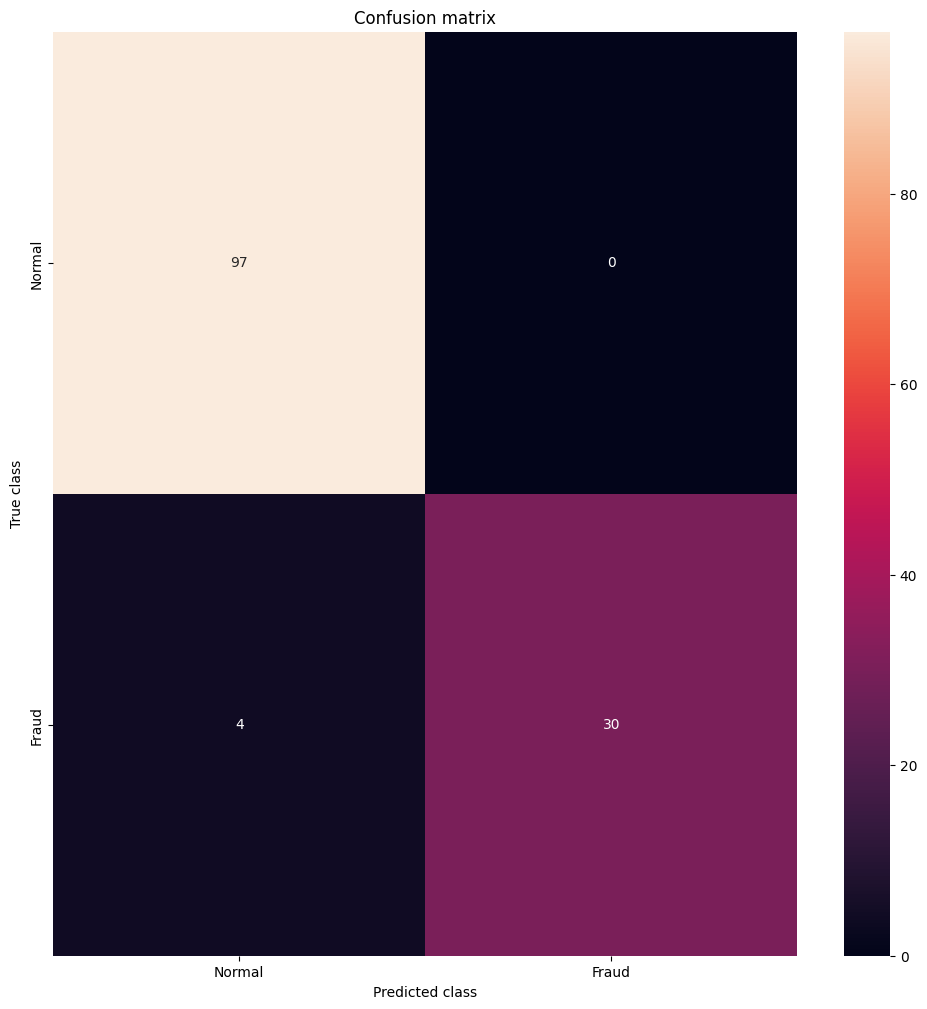

In [35]:
#visulalizing the confusion matrix

LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

**Feature Engineering:**

**Goal**: Identify which features contribute most to detecting fraud.

**Helps with**: Dimensionality reduction and interpretability.

In [36]:
df_train = new_df.copy()
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33629,37312,1.379598,-0.708231,-0.229279,-0.840353,-0.517631,-0.179819,-0.456952,-0.161552,-0.704776,0.659838,-1.785204,-0.578755,0.730269,-0.071967,1.026563,-0.824807,-0.582679,1.557239,-0.368559,-0.299827,-0.305564,-0.479345,-0.240593,-0.948251,0.479157,1.240002,-0.065376,0.003110,65.85,0.0
54746,46596,-0.462270,0.942339,1.678367,1.317183,0.268980,0.120846,0.676809,0.045325,-0.558524,-0.376800,-0.537159,0.367810,0.304178,-0.043652,0.209012,-1.236243,0.629517,-0.724771,0.783209,0.076734,0.003495,0.237894,-0.207881,0.113926,0.144024,-0.193249,0.147540,0.113486,19.28,0.0
21887,31912,-1.044281,0.186322,3.377694,1.338146,-1.564227,2.121556,0.180187,0.400890,1.352014,-0.544871,-0.681075,0.572903,-0.178066,-1.513221,-0.650098,-1.538359,1.097321,-0.728644,0.086929,0.175672,0.124012,1.235461,-0.232685,0.167672,0.282124,0.037479,0.233052,-0.115628,180.10,0.0
45212,42252,-0.359994,1.098107,0.330197,-0.106251,0.169404,1.096262,-0.197270,-2.337233,-0.557534,-0.004725,-0.049783,0.126887,-0.282966,0.746697,0.759522,0.731660,-0.732039,0.362921,1.642525,-0.412974,1.657577,-2.713795,-0.073580,-1.455404,1.161727,0.333159,0.144890,0.109982,79.95,0.0
26215,33955,1.489841,-0.381056,-0.424735,-0.762562,-0.506430,-1.154959,-0.130254,-0.305244,-0.921525,0.727114,-0.895221,-1.470342,-1.091526,0.342373,0.600504,0.931916,0.300969,-1.280850,0.832805,-0.009784,0.140532,0.288974,-0.207367,-0.107707,0.816771,-0.049118,-0.037245,-0.006579,10.00,0.0


In [37]:
#The function display_feature_importance takes a machine learning model (model) as input and performs feature importance analysis.

def display_feature_importance(model,percentage ,top_n=34, plot=False):
    # X and y
    X = df_train.drop('Class',axis=1)
    y = df_train['Class']

    #The model is fitted using the features (X) and the target variable (y), and then the feature importances are calculated.
    model.fit(X, y)

    # Get feature importance
    feature_importance = model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # A threshold is calculated based on a specified percentage of the top feature importance.
    #  Features with importance above this threshold are selected.
    threshold = percentage / 100 * feature_importance_df.iloc[0]['Importance']

    # Select features that meet the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

    #Print Selected Feature
    print("Selected Features by {} \n \n at threshold {}%; {}".format(model , percentage,selected_features))

    if plot==True:
        # Set seaborn color palette to "viridis"
        sns.set(style="whitegrid", palette="viridis")

        # Display or plot the top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Feature Importance for {}'.format(type(model).__name__))
        plt.show()

    # Add 'Exited' to the list of selected features
    selected_features.append('Class')

    return selected_features

**Loop with AUC Evaluations:**

**Goal**: Try various feature thresholds and evaluate using AUC.

**Helps with**: Selects optimal feature set to improve fraud detection performance.

In [38]:
# List to store selected features for each model and trial percentage
selected_features_xgb = []

# Initilize AUC List
auc_scores = []

# List of trial percentages
trial_percentages = [3, 5, 10, 20, 40]

# Loop over each trial percentage
for percentage in trial_percentages:
        # Get selected features for each model
        xgb_selected_features = display_feature_importance(XGBClassifier(random_state=42), percentage=percentage)

        # Append selected features to the respective lists
        selected_features_xgb.append(xgb_selected_features)

        # X and y
        X = df_train.drop('Class',axis=1)
        y = df_train['Class']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Fit models on training data
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train[[feature for feature in xgb_selected_features if feature != 'Class']], y_train, verbose=0)

        # Predict probabilities on the test set
        xgb_pred_proba = xgb_model.predict_proba(X_test[[feature for feature in xgb_selected_features if feature != 'Class']])[:, 1]

        # Calculate AUC scores and append to the list
        from sklearn.metrics import roc_auc_score

        auc_xgb = roc_auc_score(y_test, xgb_pred_proba)
        auc_scores.append((auc_xgb,percentage))

        # Sorted AUC
        sorted_auc = sorted(auc_scores, reverse=True)

# Print Each AUC with Percentage
for score , percentage in sorted_auc :
        print(f'The AUC for {type(xgb_model).__name__ , } \n with {percentage}% of top features is {score:.4f}')

Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
 
 at threshold 3%; ['V14', 'V3', 'V12', 'V5', 'V10', 'V2', 'V1', 'V4', 'V26', 'V17', 'V9', 'V23', 'V21', 'V7']
Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_byle

In [39]:
# Impottant Feature Extract Using XGb

imp_fea = ['V14', 'V10', 'V4', 'V7', 'V21', 'V8', 'V20', 'V3', 'V5', 'V11', 'V12', 'V26', 'V17','Class']
df_train = df_train[imp_fea]
df_train.head()

,V14,V10,V4,V7,V21,V8,V20,V3,V5,V11,V12,V26,V17,Class
33629,-0.071967,0.659838,-0.840353,-0.456952,-0.305564,-0.161552,-0.299827,-0.229279,-0.517631,-1.785204,-0.578755,1.240002,-0.582679,0.0
54746,-0.043652,-0.376800,1.317183,0.676809,0.003495,0.045325,0.076734,1.678367,0.268980,-0.537159,0.367810,-0.193249,0.629517,0.0
21887,-1.513221,-0.544871,1.338146,0.180187,0.124012,0.400890,0.175672,3.377694,-1.564227,-0.681075,0.572903,0.037479,1.097321,0.0
45212,0.746697,-0.004725,-0.106251,-0.197270,1.657577,-2.337233,-0.412974,0.330197,0.169404,-0.049783,0.126887,0.333159,-0.732039,0.0
26215,0.342373,0.727114,-0.762562,-0.130254,0.140532,-0.305244,-0.009784,-0.424735,-0.506430,-0.895221,-1.470342,-0.049118,0.300969,0.0


In [40]:
df_train.shape

(654, 14)

**Important Feature of Dataset Train RF with Hyperparameter Tuning:**

**RF:**

**Goal**: Tune hyperparameters for the best performance.

**Helps with**: Maximizes recall/precision while managing overfitting.

**RF:**

In [41]:
def train_random_forest(data, target):
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0,class_weight='balanced')

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_rf = best_rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_precision = precision_score(y_test, y_pred_rf)
    rf_recall = recall_score(y_test, y_pred_rf)
    rf_f1 = f1_score(y_test, y_pred_rf)

    print(f'Accuracy on Test Set: {rf_accuracy:.2f}')
    print(f'Precision on Test Set: {rf_precision:.2f}')
    print(f'Recall on Test Set: {rf_recall:.2f}')
    print(f'f1 on Test Set: {rf_f1:.2f}')

    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize =(12, 12))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    return best_rf_model, best_params, rf_accuracy, rf_precision, rf_recall, rf_f1

**Important Feature of Dataset Train RF with Hyperparameter Tuning:**

**XGB:**

**Goal**: Same as RF, using a boosting model.

**Helps with**: Often more accurate due to boosting and regularization.

**XGB:**

In [42]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
    xgb_precision = precision_score(y_test, y_pred_xgb)
    xgb_recall = recall_score(y_test, y_pred_xgb)
    xgb_f1 = f1_score(y_test, y_pred_xgb)

    print(f'Accuracy on Test Set: {xgb_accuracy:.2f}')
    print(f'Precision on Test Set: {xgb_precision:.2f}')
    print(f'Recall on Test Set: {xgb_recall:.2f}')
    print(f'f1 on Test Set: {xgb_f1:.2f}')

    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize =(12, 12))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


    return best_xgb_model, best_params, xgb_accuracy, xgb_precision, xgb_recall, xgb_f1

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy on Test Set: 0.96
Precision on Test Set: 0.98
Recall on Test Set: 0.89
f1 on Test Set: 0.93


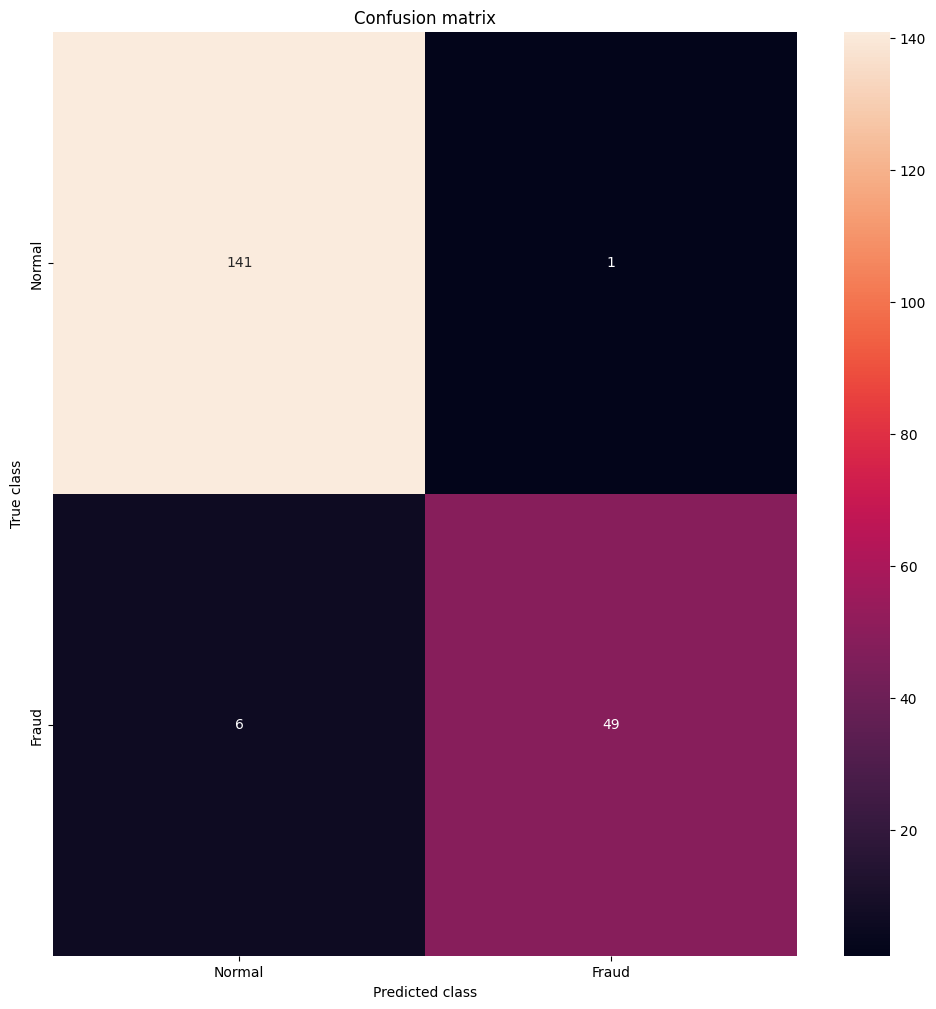

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy on Test Set: 0.96
Precision on Test Set: 0.98
Recall on Test Set: 0.89
f1 on Test Set: 0.93


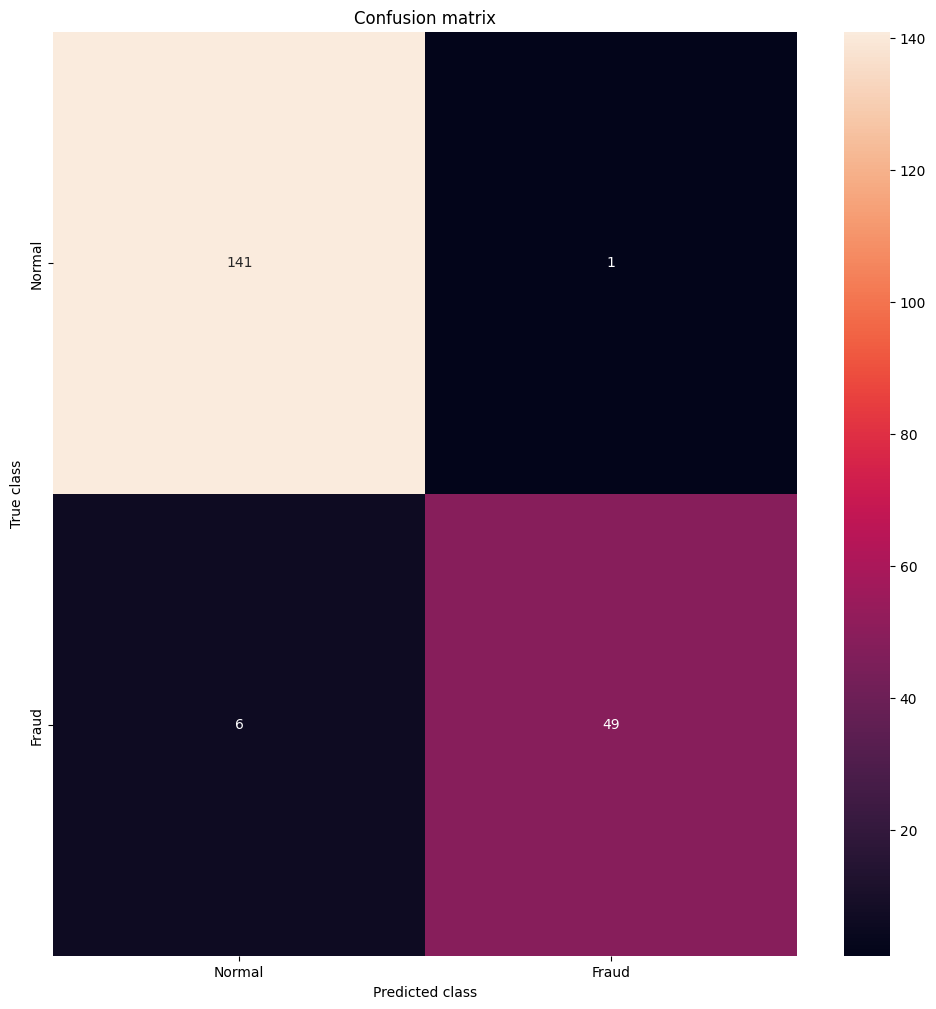

Best Accuracy: 0.96 with Model: XGBoost Classifier

Best Precision: 0.98 with Model: Random Forest Classifier
Best Recall: 0.89 with Model: Random Forest Classifier

Best F1-Score: 0.93 with Model: Random Forest Classifier


In [43]:
# Train both models and capture returned accuracies
rf_model, rf_params, rf_accuracy, rf_precision, rf_recall, rf_f1 = train_random_forest(df_train, 'Class')
xgb_model, xgb_params, xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = train_xgb_classifier(df_train, 'Class')

# Compare accuracies
models = ['XGBoost Classifier', 'Random Forest Classifier']
accuracy_scores = [xgb_accuracy, rf_accuracy]

best_accuracy_index = accuracy_scores.index(max(accuracy_scores))
print(f'Best Accuracy: {accuracy_scores[best_accuracy_index]:.2f} with Model: {models[best_accuracy_index]}')


# Compare Precision
models = ['Random Forest Classifier', 'XGBoost Classifier']
precision_scores = [rf_precision, xgb_precision]

# Find the index of the best precision
best_precision_index = precision_scores.index(max(precision_scores))

# Print the result
print(f'\nBest Precision: {precision_scores[best_precision_index]:.2f} with Model: {models[best_precision_index]}')


# Compare Recall
models = ['Random Forest Classifier', 'XGBoost Classifier']
recall_scores = [rf_recall, xgb_recall]

best_recall_index = recall_scores.index(max(recall_scores))
print(f'Best Recall: {recall_scores[best_recall_index]:.2f} with Model: {models[best_recall_index]}')


# Compare f1
models = ['Random Forest Classifier', 'XGBoost Classifier']
f1_scores = [rf_f1, xgb_f1]

# Find the index of the best F1-score
best_f1_index = f1_scores.index(max(f1_scores))

# Print the result
print(f'\nBest F1-Score: {f1_scores[best_f1_index]:.2f} with Model: {models[best_f1_index]}')


In [44]:
results = pd.DataFrame({
    'Model': ['XGBoost Classifier', 'Random Forest Classifier'],
    'Accuracy': [xgb_accuracy, rf_accuracy],
    'Precision': [xgb_precision, rf_precision],
    'Recall': [xgb_recall, rf_recall],
    'F1 Score': [xgb_f1, rf_f1]
})

# Sort and display
print(results.sort_values(by='F1 Score', ascending=False))

                      Model  Accuracy  Precision    Recall  F1 Score
0        XGBoost Classifier  0.964467       0.98  0.890909  0.933333
1  Random Forest Classifier  0.964467       0.98  0.890909  0.933333


**Summary: What Does This Entire Pipeline Achieve?**

| Step                     | Purpose                       | Value for Credit Card Fraud Detection    |
| ------------------------ | ----------------------------- | ---------------------------------------- |
| Import & Setup           | Loads required tools          | Enables full workflow                    |
| Data Loading             | Access raw transaction data   | Baseline input                           |
| Exploration              | Understand structure & issues | Spot imbalance, nulls                    |
| Cleaning & Normalization | Fix missing, scale data       | Prepare for ML                           |
| Class Balancing          | Fix skew                      | Fair model training                      |
| Feature Selection        | Reduce dimensionality         | Improve generalization                   |
| Model Training           | Build classifiers             | Predict fraud effectively                |
| Evaluation               | Assess quality                | Minimize false negatives (missed frauds) |
| Visualization            | Understand results            | Communicate insights clearly             |
